In [1]:
from CircleParticleSim import *
import numpy as np
import numpy.random as rand


initial energy 357.63795411284354


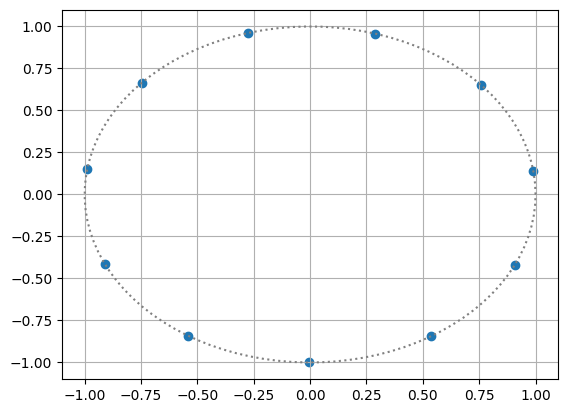

mimimal energy 97.15400245828094
mimimal energy 97.15400245828093
initial energy 208.73403465234784


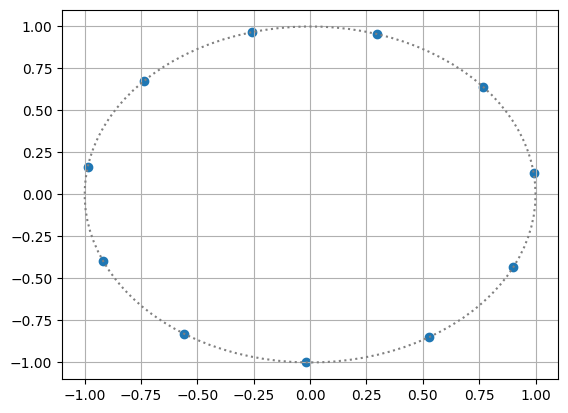

mimimal energy 97.15543508409831
mimimal energy 97.1554350840983
initial energy 182.72787699058995


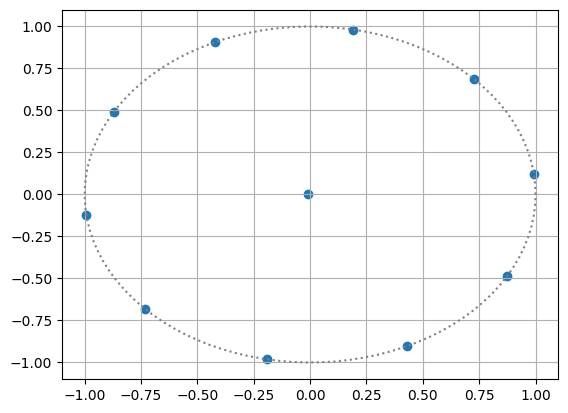

mimimal energy 97.25254296895464
mimimal energy 97.2525429689548
initial energy 229.2272444459922


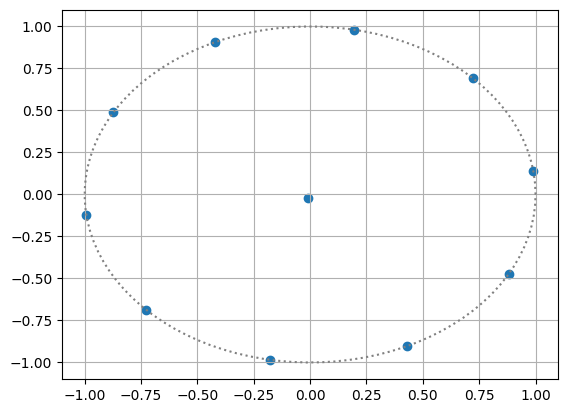

mimimal energy 97.25625173239973
mimimal energy 97.25625173240005
initial energy 242.97453705038652


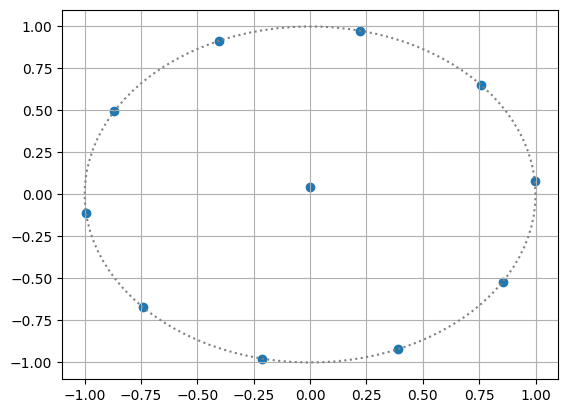

mimimal energy 97.25977691062295
mimimal energy 97.25977691062306
initial energy 216.61836614970292


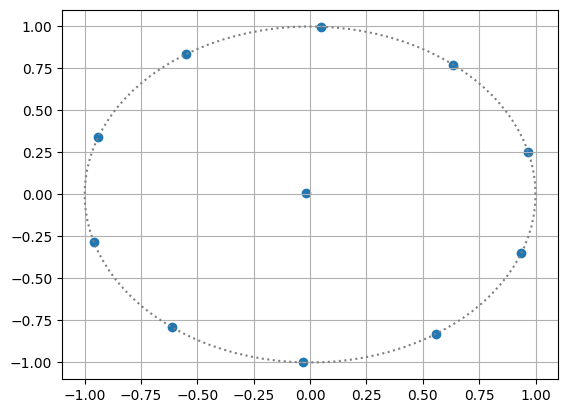

mimimal energy 97.25637384817122
mimimal energy 97.25637384817128
initial energy 349.7490858064825


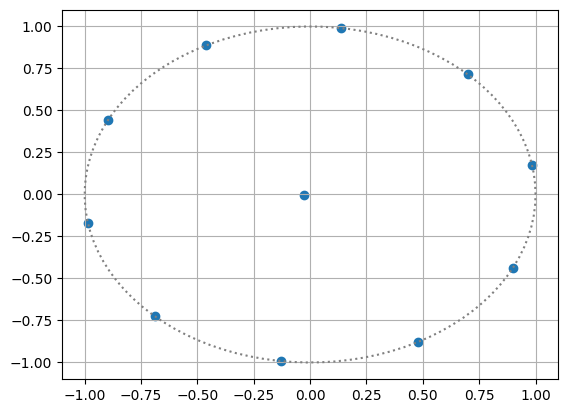

mimimal energy 97.25596574652658
mimimal energy 97.25596574652664
initial energy 240.5023697302312


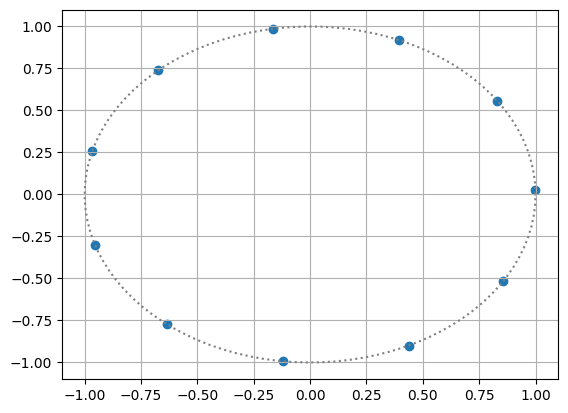

mimimal energy 97.15264638783812
mimimal energy 97.15264638783785
initial energy 285.66695838364774


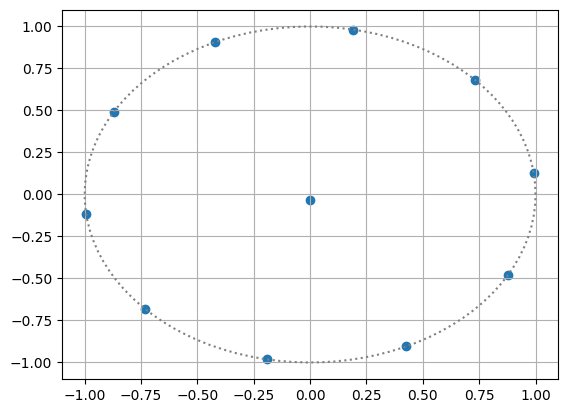

mimimal energy 97.25348009518541
mimimal energy 97.25348009518476
initial energy 257.3674223444028


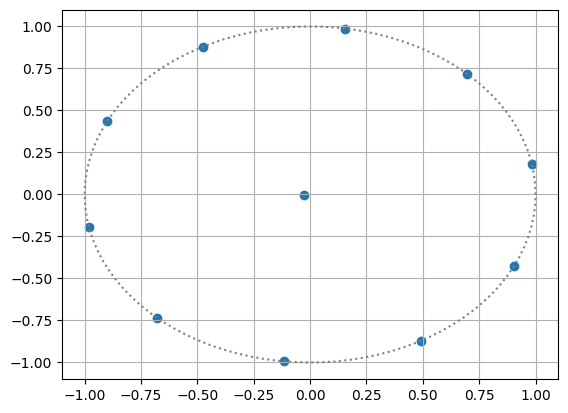

mimimal energy 97.26333159940418
mimimal energy 97.2633315994039


In [2]:
rand.seed(42)
for i in range(10):
    CircleParticleSim(11, steps=10000, seed=rand.randint(0,2**31-1),
                 cooling_schedule = paper_cooling_schedule,
                 step_size_schedule = random_step_size_schedule
                 )

initial energy 7.368769489881006
initial energy 2.4093178374278046
initial energy 3.2765843884646824
initial energy 3.359598938092599
initial energy 2.079981063611589
initial energy 5.612832773827711
initial energy 5.714521265049242
initial energy 4.487341424608198
initial energy 2.3249219446001255
initial energy 2.450176227373028
initial energy 3.1575168563727414
initial energy 1.2802629290777747
initial energy 3.014610226902378
initial energy 3.255355637360267
initial energy 1.6043599440214125
initial energy 1.2277550366926258
initial energy 2.837748820516177
initial energy 1.7062728207398876
initial energy 4.195455760178657
initial energy 5.666888784448013
initial energy 4.710181887622224
initial energy 2.8318608071358637
initial energy 3.555837793834444
initial energy 2.20072687081317
initial energy 1.5859583660419507
Completed simulation for 2 particles (averaged over 25 runs).
initial energy 11.24811542821223
initial energy 14.665083405967533
initial energy 8.228567498720128
init

,Particles,Internal Count (Avg),Total Energy (Avg)
0,2,0.00,1.000252
1,3,0.00,3.464440
2,4,0.00,7.657663
3,5,0.00,13.764810
4,6,0.00,21.929410
5,7,0.00,32.268499
6,8,0.00,44.880011
7,9,0.28,60.138765
8,10,0.48,77.540869
9,11,0.80,97.235970


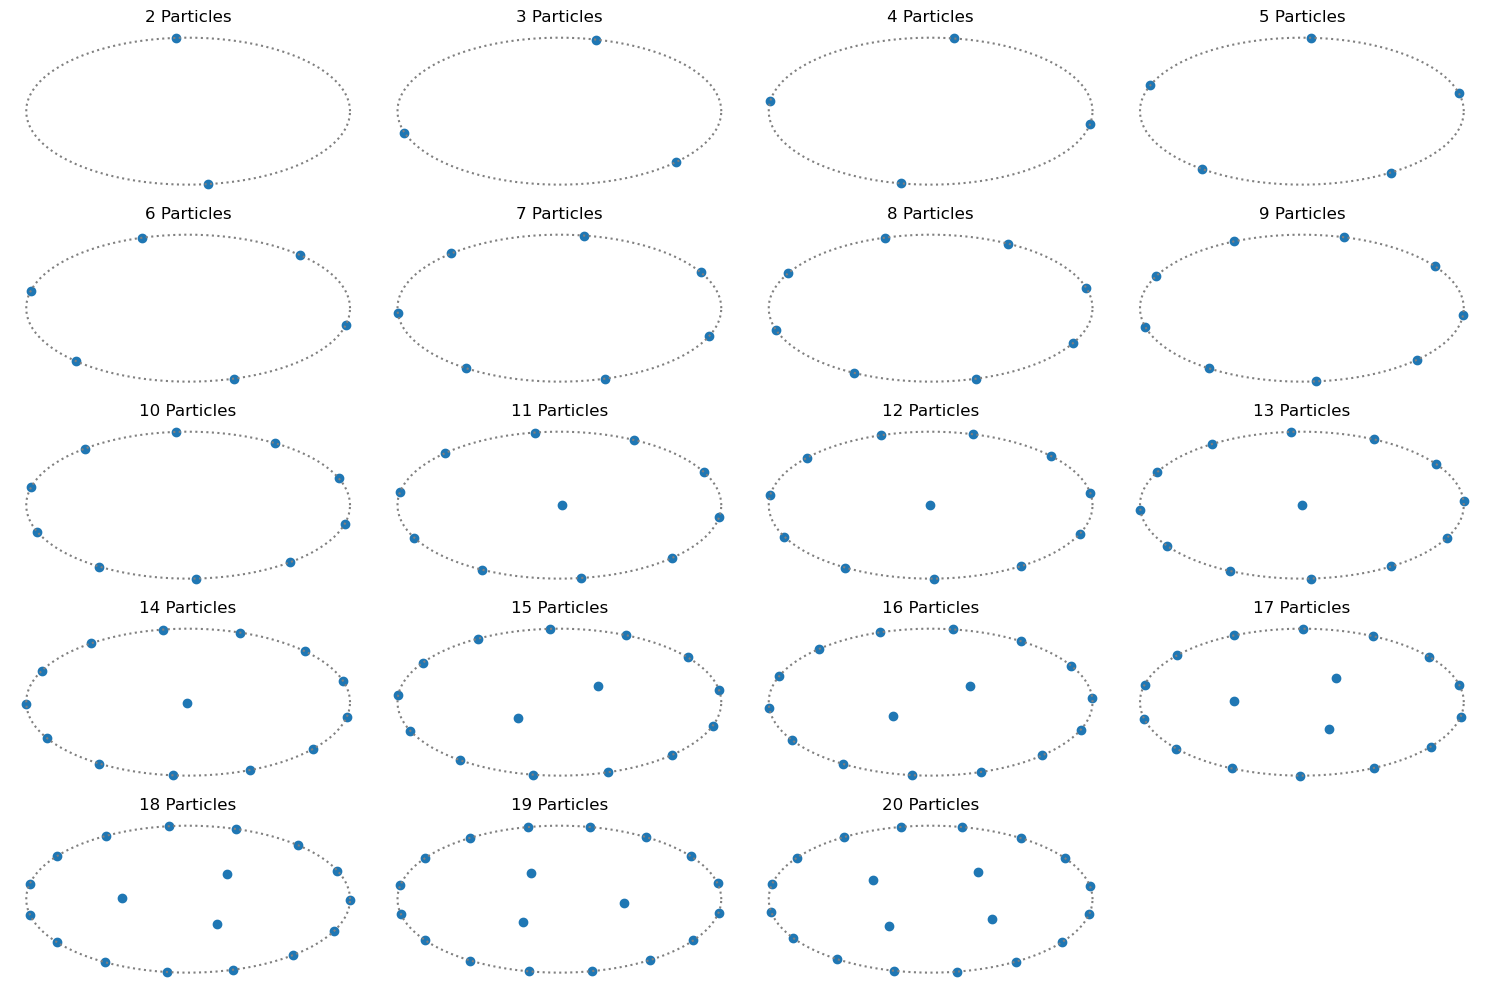

In [5]:
def run_experiment(max_particles, steps, num_runs=10):
    """
    Run the simulation for a range of particle numbers and record averaged results.

    Parameters:
    - max_particles: Maximum number of particles to test.
    - steps: Number of simulation steps.
    - num_runs: Number of simulation runs to average results.

    Returns:
    - results: A list of dictionaries containing particle count, averaged internal particle count, and energy.
    - examples: List of tuples containing particle count and their locations.
    """
    results = []
    examples = []

    for num_particles in range(2, max_particles + 1):
        internal_counts = []
        energies = []
        example_locations = None

        for run in range(num_runs):
            sim = CircleParticleSim(
                N=num_particles,
                cooling_schedule=basic_cooling_schedule,
                step_size_schedule=random_step_size_schedule,  # Use random step size
                steps=steps
            )
            sim.run_simulation(steps)

            internal_counts.append(np.sum(np.linalg.norm(sim.particle_locations, axis=1) < 0.99))
            energies.append(sim.E)

            if run == 0:  # Save the first run as an example
                example_locations = sim.particle_locations

        avg_internal_count = np.mean(internal_counts)
        avg_energy = np.mean(energies)

        results.append({
            "Particles": num_particles,
            "Internal Count (Avg)": avg_internal_count,
            "Total Energy (Avg)": avg_energy
        })

        examples.append((num_particles, example_locations))
        print(f"Completed simulation for {num_particles} particles (averaged over {num_runs} runs).")

    return results, examples

def plot_results_and_examples(results, examples):
    """
    Plot the results table and one example configuration for each particle count in a combined figure.

    Parameters:
    - results: List of dictionaries containing particle count, averaged internal particle count, and energy.
    - examples: List of tuples containing particle count and their locations.
    """
    import pandas as pd
    from IPython.display import display

    # Convert results to a DataFrame and display it
    results_df = pd.DataFrame(results)
    display(results_df)

    # Plot particle configurations
    num_examples = len(examples)
    fig, axes = plt.subplots(nrows=(num_examples // 4) + 1, ncols=4, figsize=(15, 10))
    axes = axes.flatten()

    for idx, (num_particles, locations) in enumerate(examples):
        ax = axes[idx]
        thetas = np.linspace(0, 2 * np.pi, 100)
        ax.plot(np.cos(thetas), np.sin(thetas), linestyle=':', color='gray')
        ax.scatter(locations[:, 0], locations[:, 1])
        ax.set_title(f"{num_particles} Particles")
        ax.set_xlim([-1.1, 1.1])
        ax.set_ylim([-1.1, 1.1])
        ax.axis('off')

    # Turn off unused subplots
    for ax in axes[len(examples):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    num_particles = 5
    max_particles = 20
    steps = 10000
    num_runs = 25

    # Run the experiment and collect results
    results, examples = run_experiment(max_particles, steps, num_runs)

    # Plot results table and example configurations
    plot_results_and_examples(results, examples)